Mutual Information
MI Estimate mutual information for a discrete target variable.

Mutual information (MI) between two random variables is a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency.

The function relies on nonparametric methods based on entropy estimation from k-nearest neighbors distances.

Inshort

A quantity called mutual information measures the amount of information one can obtain from one random variable given another.

The mutual information between two random variables X and Y can be stated formally as follows:

I(X ; Y) = H(X) – H(X | Y) Where I(X ; Y) is the mutual information for X and Y, H(X) is the entropy for X and H(X | Y) is the conditional entropy for X given Y. The result has the units of bits.

Youtube Videos
Entropy: https://www.youtube.com/watch?v=1IQOtJ4NI_0

Information Gain: https://www.youtube.com/watch?v=FuTRucXB9rA

Gini Impurity: https://www.youtube.com/watch?v=5aIFgrrTqOw

Statistical test: https://www.youtube.com/watch?v=4-rxTA_5_xA

### Higher the information gain, higher is the dependency of that variable with the output.

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('wine.csv')
df.head()

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [11]:
df['Wine'].unique()

array([1, 2, 3], dtype=int64)

In [3]:
#Train test split to avoid overfitting
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.drop(labels=['Wine'], axis=1),
    df['Wine'],
    test_size=0.3,
    random_state=0)

In [4]:
X_train.head()

,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,Proline
22,13.71,1.86,2.36,16.6,101,2.61,2.88,0.27,1.69,3.80,1.11,4.00,1035
108,12.22,1.29,1.94,19.0,92,2.36,2.04,0.39,2.08,2.70,0.86,3.02,312
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
145,13.16,3.57,2.15,21.0,102,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830
71,13.86,1.51,2.67,25.0,86,2.95,2.86,0.21,1.87,3.38,1.36,3.16,410


In [5]:
from sklearn.feature_selection import mutual_info_classif
#determne the mutual informtaion
mutual_info=mutual_info_classif(X_train,y_train)
mutual_info

array([0.42221945, 0.30786956, 0.1524199 , 0.25212942, 0.16348352,
       0.4682947 , 0.72095038, 0.12028212, 0.27147265, 0.61969002,
       0.55179307, 0.54429663, 0.5390017 ])

In [7]:
mutual_info=pd.Series(mutual_info)
mutual_info.index=X_train.columns
mutual_info.sort_values(ascending=False)

Flavanoids              0.720950
Color.int               0.619690
Hue                     0.551793
OD                      0.544297
Proline                 0.539002
Phenols                 0.468295
Alcohol                 0.422219
Malic.acid              0.307870
Proanth                 0.271473
Acl                     0.252129
Mg                      0.163484
Ash                     0.152420
Nonflavanoid.phenols    0.120282
dtype: float64

In [8]:
#mutual_info_classif gives values between 0 and 1. Never gives any negative value.

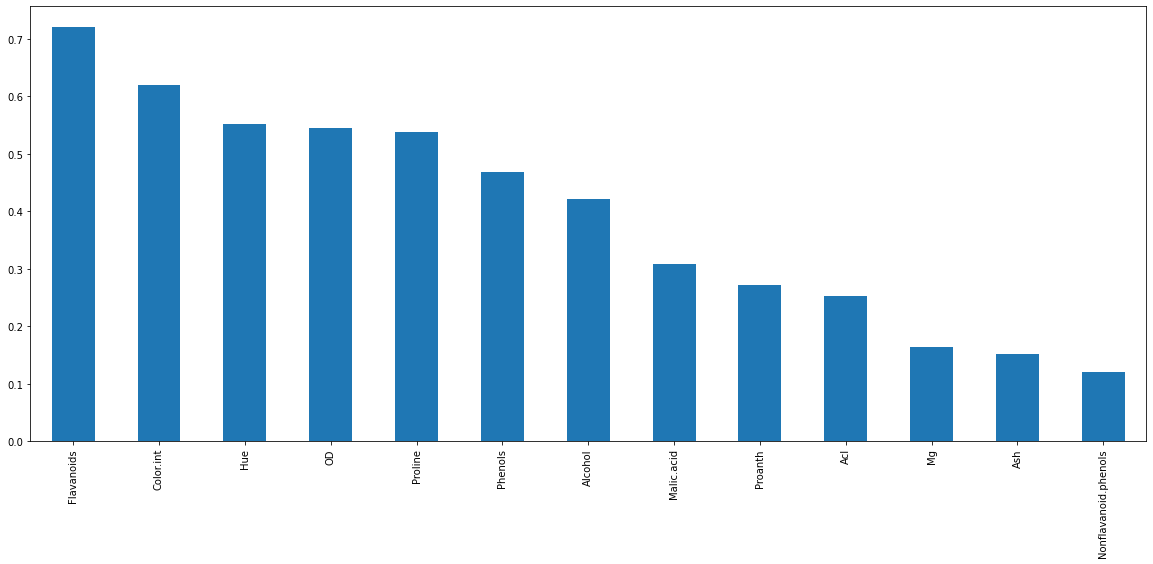

In [9]:
#Lets plot the ordered mutual info values per feature
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20,8))

In [10]:
from sklearn.feature_selection import SelectKBest

In [12]:
#We will select the top 5 important features
sel_five_cols=SelectKBest(mutual_info_classif,k=5) #creating an instance of the class SelectKBest with mutual_info_classif 
#as the parameter.
sel_five_cols.fit(X_train,y_train)
X_train.columns[sel_five_cols.get_support()]

Index(['Flavanoids', 'Color.int', 'Hue', 'OD', 'Proline'], dtype='object')

In [13]:
sel_five_cols.get_support()

array([False, False, False, False, False, False,  True, False, False,
        True,  True,  True,  True])